In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('games.csv')
df1 = pd.read_csv('guesses.csv')
df2 = pd.read_csv('repeat-player-prediction.csv')

In [4]:
df.head()

,gameId,user,startTime,finishTime,duration,targetNum,numGuesses,guess1,guess2,guess3,...,guess6,guess7,guess8,guess9,guess10,guess11,guess12,guess13,guess14,guess15
0,a6d0fa4f-6efa-43f4-9d63-6575f31eb5a2,12884,2019-09-21 11:18:51.139,2019-09-21 11:19:37.088,46,5,6,41,39.0,20.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27b85f0d-cc3d-45fd-825b-3eb23381c70f,3717,2019-09-21 11:19:32.344,2019-09-21 11:20:06.389,34,12,7,52,38.0,10.0,...,40.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5906973a-3c8f-4a30-a513-c75ede4f59be,3717,2019-09-21 11:20:19.084,2019-09-21 11:21:46.455,87,67,14,10,34.0,53.0,...,70.0,61.0,3.0,63.0,66.0,69.0,68.0,7.0,67.0,NaN
3,b4af0384-23dc-4715-9b9e-c89d80c1505e,3717,2019-09-21 11:21:59.364,2019-09-21 11:23:30.844,91,87,13,100,61.0,70.0,...,29.0,79.0,1.0,81.0,91.0,89.0,88.0,87.0,NaN,NaN
4,5bf4f71b-92cd-460c-81af-181adf5ddb32,14239,2019-09-21 11:24:43.279,2019-09-21 11:25:54.891,72,44,11,64,30.0,35.0,...,40.0,50.0,41.0,45.0,43.0,44.0,NaN,NaN,NaN,NaN


In [5]:
df1.head()

,gameId,targetNum,attemptNum,guess,risk,perfectGuess,outOfBounds,lowerBound,upperBound
0,a6d0fa4f-6efa-43f4-9d63-6575f31eb5a2,5.0,1.0,41.0,0.18,0,0,1.0,100.0
1,a6d0fa4f-6efa-43f4-9d63-6575f31eb5a2,5.0,2.0,39.0,0.36,0,0,1.0,40.0
2,a6d0fa4f-6efa-43f4-9d63-6575f31eb5a2,5.0,3.0,20.0,0.00,1,0,1.0,38.0
3,a6d0fa4f-6efa-43f4-9d63-6575f31eb5a2,5.0,4.0,10.0,0.00,1,0,1.0,19.0
4,a6d0fa4f-6efa-43f4-9d63-6575f31eb5a2,5.0,5.0,7.0,0.04,0,0,1.0,9.0


In [6]:
df2.head()

,user,guessSpeed,gameLength,num_guesses,targetNum,1stguessrisk,willReturn
0,0,5.714286,40,7,32,36,1
1,1,9.000000,9,1,49,1,1
2,2,7.750000,62,8,59,10,0
3,3,6.875000,55,8,42,30,0
4,4,6.142857,43,7,3,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50881 entries, 0 to 50880
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gameId      50881 non-null  object 
 1   user        50881 non-null  int64  
 2   startTime   50881 non-null  object 
 3   finishTime  50881 non-null  object 
 4   duration    50881 non-null  int64  
 5   targetNum   50881 non-null  int64  
 6   numGuesses  50881 non-null  int64  
 7   guess1      50881 non-null  int64  
 8   guess2      50297 non-null  float64
 9   guess3      49220 non-null  float64
 10  guess4      47302 non-null  float64
 11  guess5      44154 non-null  float64
 12  guess6      39050 non-null  float64
 13  guess7      31952 non-null  float64
 14  guess8      23960 non-null  float64
 15  guess9      16999 non-null  float64
 16  guess10     11691 non-null  float64
 17  guess11     7815 non-null   float64
 18  guess12     5053 non-null   float64
 19  guess13     3138 non-null

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384053 entries, 0 to 384052
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   gameId        384053 non-null  object 
 1   targetNum     384053 non-null  float64
 2   attemptNum    384053 non-null  float64
 3   guess         384053 non-null  float64
 4   risk          384053 non-null  float64
 5   perfectGuess  384053 non-null  int64  
 6   outOfBounds   384053 non-null  int64  
 7   lowerBound    384053 non-null  float64
 8   upperBound    384053 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 26.4+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14782 entries, 0 to 14781
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user          14782 non-null  int64  
 1   guessSpeed    14782 non-null  float64
 2   gameLength    14782 non-null  int64  
 3   num_guesses   14782 non-null  int64  
 4   targetNum     14782 non-null  int64  
 5   1stguessrisk  14782 non-null  int64  
 6   willReturn    14782 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 808.5 KB


#Cleaning games.csv

startTime and finishTime are in string format, convert to datetime

In [10]:
df['startTime'] = pd.to_datetime(df['startTime'])
df['finishTime'] = pd.to_datetime(df['finishTime'])

In [11]:
print(df.isnull().sum())

gameId            0
user              0
startTime         0
finishTime        0
duration          0
targetNum         0
numGuesses        0
guess1            0
guess2          584
guess3         1661
guess4         3579
guess5         6727
guess6        11831
guess7        18929
guess8        26921
guess9        33882
guess10       39190
guess11       43066
guess12       45828
guess13       47743
guess14       49099
guess15       50122
dtype: int64


In [12]:
columns_to_drop = ['guess7', 'guess8', 'guess9', 'guess10', 'guess11', 'guess12', 'guess13', 'guess14', 'guess15']
df = df.drop(columns=columns_to_drop)

In [13]:
df.fillna(0, inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.to_csv('games_cleaned.csv', index=False)

#Cleaning guesses.csv

In [16]:
print(df1.isnull().sum())

gameId          0
targetNum       0
attemptNum      0
guess           0
risk            0
perfectGuess    0
outOfBounds     0
lowerBound      0
upperBound      0
dtype: int64


In [17]:
df1.drop_duplicates(inplace=True)

In [18]:
df1.to_csv('guesses_cleaned.csv', index=False)

#Cleaning repeat_player_predict

In [19]:
print(df2.isnull().sum())

user            0
guessSpeed      0
gameLength      0
num_guesses     0
targetNum       0
1stguessrisk    0
willReturn      0
dtype: int64


In [20]:
df2.drop_duplicates(inplace=True)

In [21]:
df2.to_csv('repeat-player-prediction_cleaned.csv', index=False)

In [22]:
df_games = pd.read_csv('games_cleaned.csv')
df1_guesses = pd.read_csv('guesses_cleaned.csv')
df2_prediction = pd.read_csv('repeat-player-prediction_cleaned.csv')

Distribution of Games duration and number of guesses

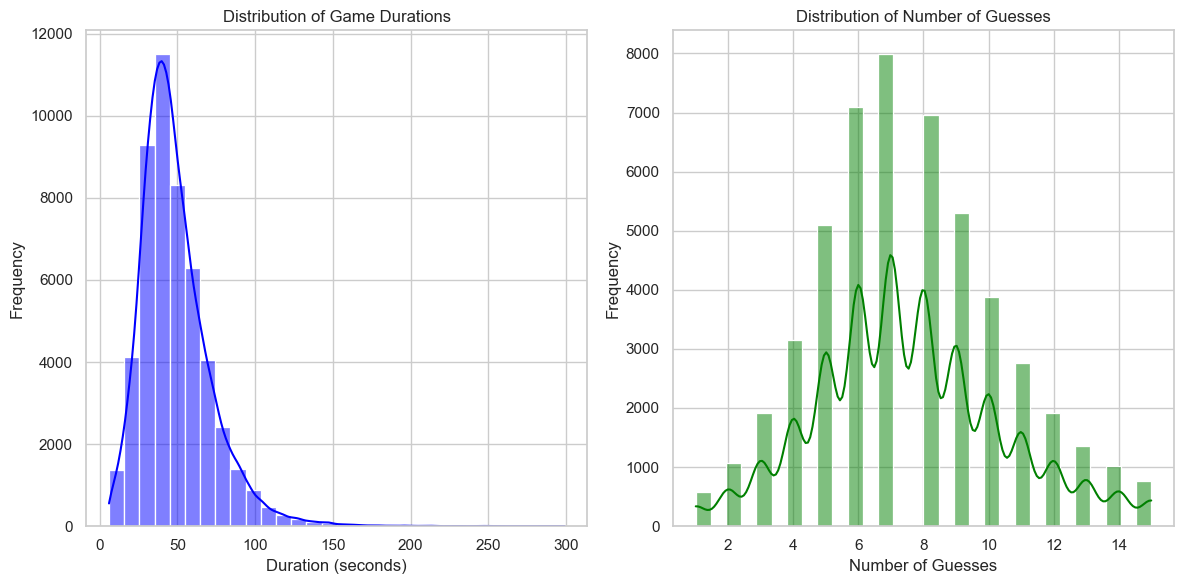

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Plot histogram for game durations
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df_games["duration"], bins=30, kde=True, color="blue")
plt.title("Distribution of Game Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")

# Plot histogram for number of guesses
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df_games["numGuesses"], bins=30, kde=True, color="green")
plt.title("Distribution of Number of Guesses")
plt.xlabel("Number of Guesses")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

Distribution of Game Durations:
The histogram is right-skewed, indicating that most games are of shorter duration, with a few games extending to much longer sessions. The peak of the distribution occurs below 50 seconds, suggesting that the median game duration is relatively short.
The spread of the game durations from around 0 to 250 seconds, with a sharp decline in frequency as the duration increases, indicates that while most games are quick, a few can last significantly longer.
The long tail towards the right suggests there are outliers where some games unusually last longer than the typical game.

Distribution of Number of Guesses:
This histogram shows a multi-modal distribution with several peaks, suggesting that there are common numbers of guesses that are more frequent than others.
The highest peaks appear around 5, 7, and 9 guesses, indicating these are the most common outcomes for the number of guesses in a game and the distribution spans from 1 guess to around 14 guesses, with frequencies tapering off for higher numbers of guesses.
The multi-modal nature could imply that certain strategic guessing behaviors or game designs lead to these common numbers of guesses.


Combined Analysis:
The duration and number of guesses likely reflect the game's complexity and players' proficiency. Shorter durations and specific common guess numbers could be indicative of easier challenges or more skilled players.
Understanding these distributions can help game designers balance game difficulty and predict typical player engagement levels.

These insights are crucial for making data-driven decisions in game development, such as adjusting game difficulty, setting expected game completion times, and designing levels that align with typical player behaviors.

FREQUENCY OF PLAY PER USER TO IDENTIFY CORE VS CASUAL USERS

count    14782.000000
mean         3.442092
std          5.413351
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        178.000000
Name: count, dtype: float64


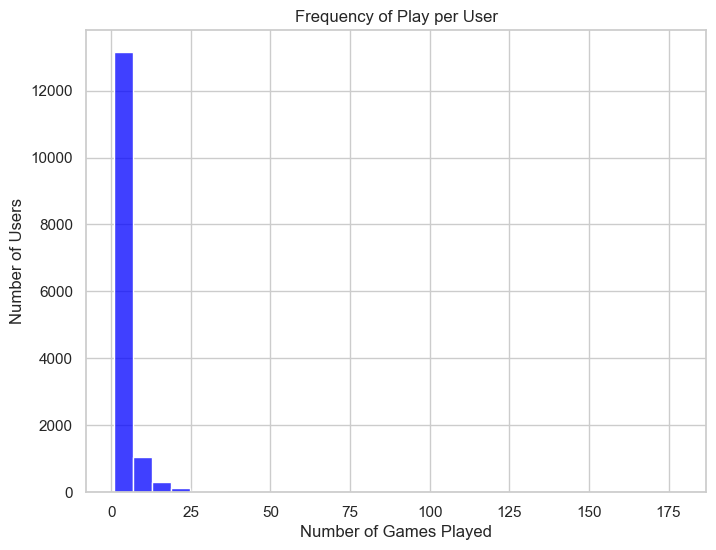

Threshold for core players: 4.0


In [24]:
# Calculate frequency of games per user
user_game_counts = df_games["user"].value_counts()

# Describe the distribution
print(user_game_counts.describe())

# Plot the distribution of game frequency
plt.figure(figsize=(8, 6))
sns.histplot(user_game_counts, bins=30, kde=False, color="blue")
plt.title("Frequency of Play per User")
plt.xlabel("Number of Games Played")
plt.ylabel("Number of Users")
plt.show()

# Optional: Define a threshold to identify core vs casual players
threshold = user_game_counts.quantile(0.75)  # 75th percentile as threshold
print(f"Threshold for core players: {threshold}")
core_players = user_game_counts[user_game_counts > threshold]
casual_players = user_game_counts[user_game_counts <= threshold]

Histogram Analysis:
The histogram is highly right-skewed, showing that a large majority of users have played only a few games. This is typical for many applications where a large number of users try out the game but only a small fraction continue playing many games.
Most users have played fewer than 25 games, as indicated by the first two bars of the histogram, which include the bulk of the data.
There are users who have played many more games than typical, up to a maximum of 178 games. These users represent a very small portion of the total user base.


Descriptive Statistics Analysis:
There are 14,782 users in the dataset. On average, users have played about 3.44 games.
The standard deviation is 5.41, indicating a wide spread in the data, which is consistent with the skewed nature of the distribution.


Percentiles:
25%: 25% of users have played only 1 game.
50% (Median): 50% of users have played 2 or fewer games.
75%: 75% of users have played 4 or fewer games.
Max: The maximum number of games played by a single user is 178.


Interpretation and Implications
This data indicates that there are very few "core" users with high engagement, as evidenced by the small number who play many games. The vast majority are "casual" users who play fewer games.
For marketing and development, focusing on converting casual players to more engaged users could be key to increasing overall user retention and engagement.

Understanding the needs and gameplay habits of both core and casual players can help tailor features and updates to suit these different user groups more effectively.

The skewed distribution suggests that strategies to increase user engagement need to be targeted at both ends of the spectrum: enhancing initial user experience to improve casual user retention and adding depth or rewards to keep engaged users coming back

TIME SERIES ANALYSIS

In [25]:
df_games['startTime'] = pd.to_datetime(df_games['startTime'])
df_games['finishTime'] = pd.to_datetime(df_games['finishTime'])

In [26]:
# Extract date from 'startTime' for daily aggregation
df_games["date"] = df_games["startTime"].dt.date

# Extract hour and day of week for further analysis
df_games["hour"] = df_games["startTime"].dt.hour
df_games["day_of_week"] = df_games["startTime"].dt.dayofweek  # Monday=0, Sunday=6

In [27]:
df_games.head()

,gameId,user,startTime,finishTime,duration,targetNum,numGuesses,guess1,guess2,guess3,guess4,guess5,guess6,date,hour,day_of_week
0,a6d0fa4f-6efa-43f4-9d63-6575f31eb5a2,12884,2019-09-21 11:18:51.139,2019-09-21 11:19:37.088,46,5,6,41,39.0,20.0,10.0,7.0,5.0,2019-09-21,11,5
1,27b85f0d-cc3d-45fd-825b-3eb23381c70f,3717,2019-09-21 11:19:32.344,2019-09-21 11:20:06.389,34,12,7,52,38.0,10.0,24.0,20.0,40.0,2019-09-21,11,5
2,5906973a-3c8f-4a30-a513-c75ede4f59be,3717,2019-09-21 11:20:19.084,2019-09-21 11:21:46.455,87,67,14,10,34.0,53.0,54.0,60.0,70.0,2019-09-21,11,5
3,b4af0384-23dc-4715-9b9e-c89d80c1505e,3717,2019-09-21 11:21:59.364,2019-09-21 11:23:30.844,91,87,13,100,61.0,70.0,71.0,73.0,29.0,2019-09-21,11,5
4,5bf4f71b-92cd-460c-81af-181adf5ddb32,14239,2019-09-21 11:24:43.279,2019-09-21 11:25:54.891,72,44,11,64,30.0,35.0,36.0,80.0,40.0,2019-09-21,11,5


Trend over time in player performance and engagement

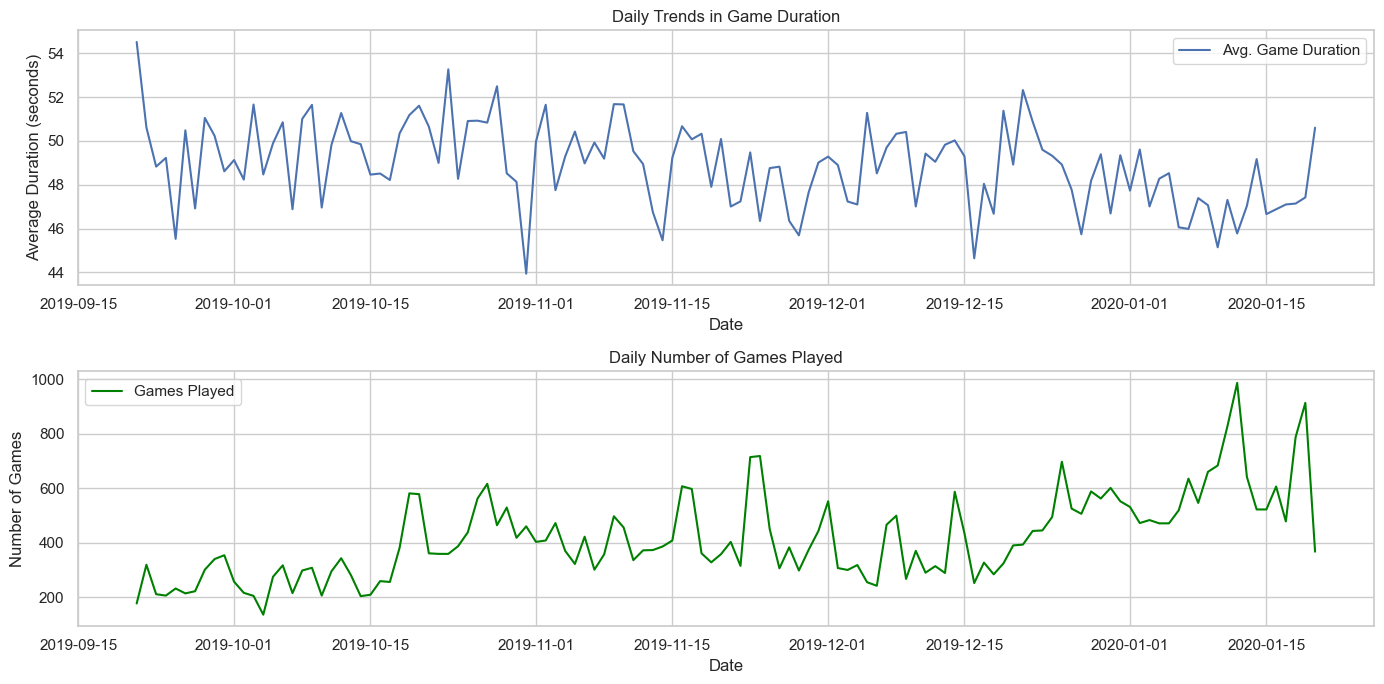

In [28]:
# Daily aggregates
daily_aggregates = (
    df_games.groupby("date")
    .agg(
        {
            "duration": "mean",  # Average game duration per day
            "numGuesses": "mean",  # Average number of guesses per day
            "gameId": "count",  # Number of games played per day
        }
    )
    .rename(columns={"gameId": "games_played"})
)

# Plotting trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(
    daily_aggregates.index, daily_aggregates["duration"], label="Avg. Game Duration"
)
plt.title("Daily Trends in Game Duration")
plt.xlabel("Date")
plt.ylabel("Average Duration (seconds)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(
    daily_aggregates.index,
    daily_aggregates["games_played"],
    color="green",
    label="Games Played",
)
plt.title("Daily Number of Games Played")
plt.xlabel("Date")
plt.ylabel("Number of Games")
plt.legend()

plt.tight_layout()
plt.show()

Daily Trends in Game Duration:

The plot displays fluctuations in the average game duration, with values typically oscillating between 46 and 54 seconds. There doesn't appear to be a clear long-term trend (upward or downward) over the observed period.
The average game duration remains relatively stable over time, which might indicate that the game's difficulty or players' proficiency has not changed significantly during this period. The minor fluctuations could be related to different player groups engaging with the game on different days or minor changes in game conditions.


Daily Number of Games Played:
This plot shows more variability compared to the game duration plot. There is a general upward trend towards the end of the year, particularly noticeable from early December onwards, where the number of games played per day increases significantly. There are several sharp spikes in the number of games played, which might correlate with weekends or holidays when players have more free time. Such spikes could also be the result of promotional activities or special game events designed to increase player engagement.
The significant rise in games played at the end of the data period could be attributed to holiday breaks or special year-end promotions within the game.


Combined Analysis and Implications:

Engagement Insights: While the duration of gameplay remains stable, the number of games played varies considerably. This suggests that while the player's engagement in terms of time spent per game is consistent, the overall engagement in terms of sessions or logins fluctuates and seems to be influenced by external factors (time of year, promotions).

Marketing and Management Strategies: The insights from these trends can be used to plan marketing and player engagement strategies. For instance, boosting advertising efforts or scheduling events around the times showing increased play can potentially enhance player engagement and retention.
This time-series analysis helps in understanding both the consistency of player performance and the variability in engagement, guiding strategic decisions in game development and marketing.

Time of Day or Day of Week Effects

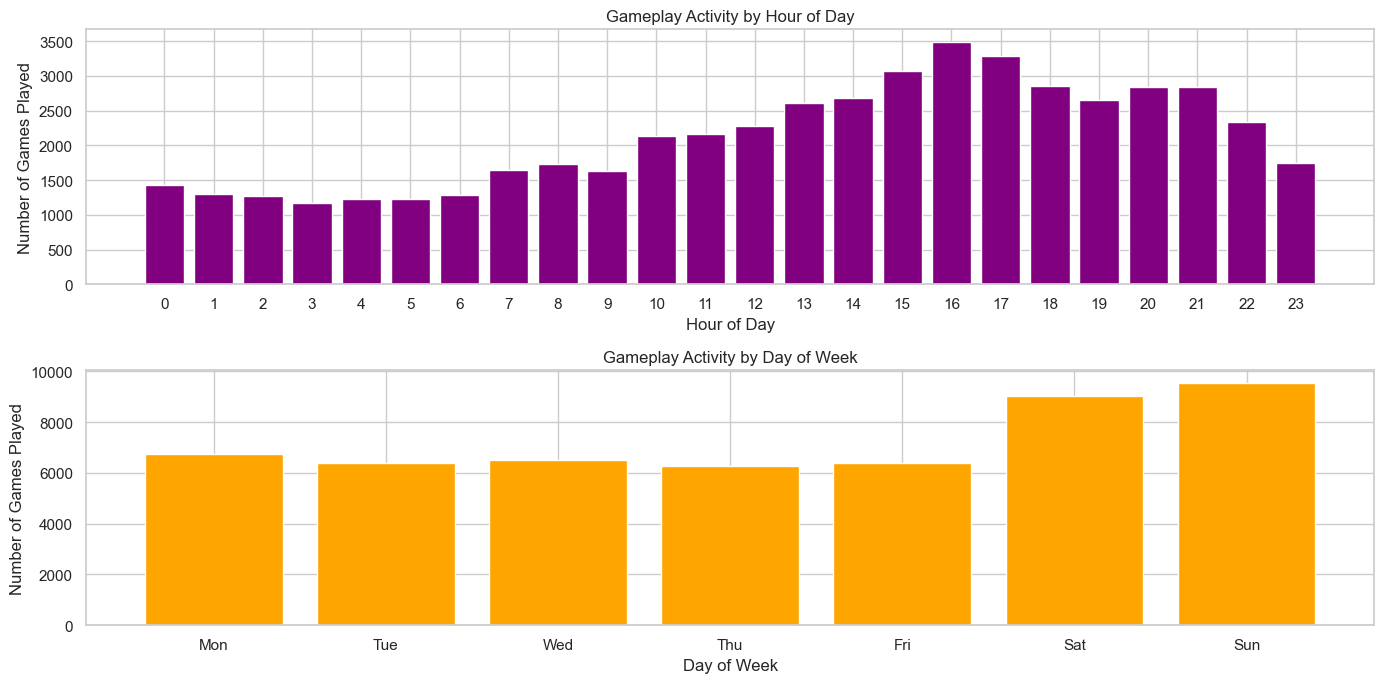

In [29]:
# Aggregating by hour of day
hourly_aggregates = (
    df_games.groupby("hour")
    .agg({"duration": "mean", "numGuesses": "mean", "gameId": "count"})
    .rename(columns={"gameId": "games_played"})
)

# Aggregating by day of week
weekly_aggregates = (
    df_games.groupby("day_of_week")
    .agg({"duration": "mean", "numGuesses": "mean", "gameId": "count"})
    .rename(columns={"gameId": "games_played"})
)

# Plotting hourly trends
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.bar(hourly_aggregates.index, hourly_aggregates["games_played"], color="purple")
plt.title("Gameplay Activity by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Games Played")
plt.xticks(range(0, 24))

# Plotting weekly trends
plt.subplot(2, 1, 2)
plt.bar(weekly_aggregates.index, weekly_aggregates["games_played"], color="orange")
plt.title("Gameplay Activity by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Games Played")
plt.xticks(range(0, 7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

plt.tight_layout()
plt.show()

Gameplay Activity by Hour of Day:
There is a clear trend showing variation in the number of games played throughout the day. Activity starts to increase from the early morning hours, peaks during the late afternoon and evening, and then decreases towards late night.
The highest levels of activity occur between 3 PM and 5 PM, which could be when players are most likely free from work or school obligations. Although, there's a decrease after the peak hours, there is still substantial activity until about 10 PM, after which it gradually declines but remains notable until midnight.


Gameplay Activity by Day of Week:
Weekly Trend: This bar graph shows that gameplay activity varies across the week. The lowest levels of activity are on Monday and Wednesday, while the weekends, particularly Sunday, show the highest activity.

Saturday and Sunday see a significant increase in games played, likely reflecting more free time available to players during the weekend. The drop on Wednesdays could be attributed to midweek obligations or possibly a lesser interest in engaging with the game at this point of the week.


Combined Analysis and Strategic Implications:
Knowing that player activity peaks in the late afternoon and evening, promotional events or special game content releases could be timed to coincide with these hours to maximize participation and engagement.

The dip in activity on Wednesdays suggests a potential opportunity to introduce midweek incentives to boost player engagement.
Weekend Promotions: With the highest activity on weekends, particularly Sundays, these days could be ideal for hosting special events or promotions to attract even greater player interaction.

These insights can help game developers and marketers to tailor their strategies, ensuring that they align content releases, promotional activities, and player support to coincide with peak times of player activity. This approach maximizes engagement and potentially increases revenue and player satisfaction.

PREDICTIVE MODELLING

In [30]:
df2_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14782 entries, 0 to 14781
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user          14782 non-null  int64  
 1   guessSpeed    14782 non-null  float64
 2   gameLength    14782 non-null  int64  
 3   num_guesses   14782 non-null  int64  
 4   targetNum     14782 non-null  int64  
 5   1stguessrisk  14782 non-null  int64  
 6   willReturn    14782 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 808.5 KB


In [31]:
# importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [32]:
from imblearn.over_sampling import SMOTE 

In [33]:
# Check class composition
class_counts = df2_prediction["willReturn"].value_counts()
print("Class Distribution before Smoothing:")
print(class_counts)

Class Distribution before Smoothing:
willReturn
1    9282
0    5500
Name: count, dtype: int64


In [34]:
# Split the data into features and target
X = df2_prediction.drop("willReturn", axis=1)
y = df2_prediction["willReturn"]

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [36]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new class distribution
new_class_counts = pd.Series(y_train_balanced).value_counts()
print("Class Distribution after Smoothing:")
print(new_class_counts)

Class Distribution after Smoothing:
willReturn
1    6490
0    6490
Name: count, dtype: int64


In [37]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

# Predict on the testing set
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

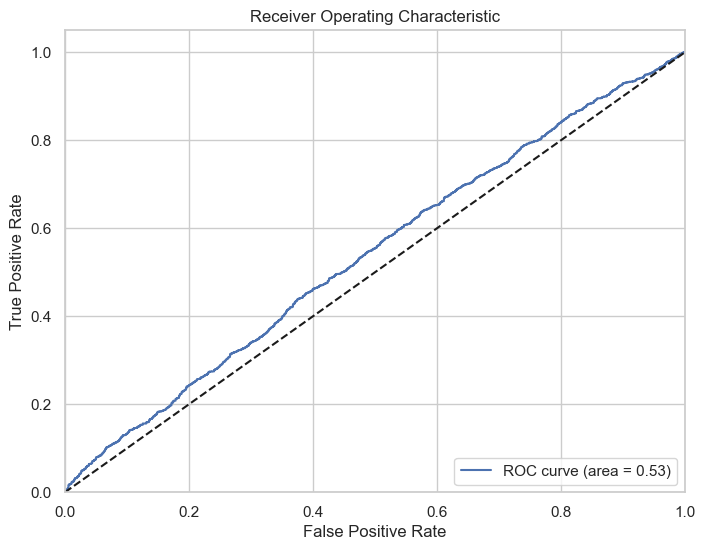

In [39]:
# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [40]:
# Print accuracy and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.5655016910935738
Confusion Matrix:
[[ 637 1006]
 [ 921 1871]]


In [41]:
# Feature importance
importance = model.coef_[0]
feature_importance = pd.DataFrame(
    importance, index=X.columns, columns=["Importance"]
).sort_values("Importance", ascending=False)
print(feature_importance)

              Importance
guessSpeed      0.052305
num_guesses     0.051567
user           -0.000005
targetNum      -0.000034
1stguessrisk   -0.000391
gameLength     -0.013954


ROC Curve and AUC (Area Under the Curve):


AUC Value of 0.53: The ROC curve shows an AUC of 0.53, which is slightly above 0.50, the AUC of a completely random classifier. An AUC of 0.53 suggests that the model has a marginal ability to distinguish between the classes (players who will return vs. players who will not return). While this indicates some predictive capability, it is still close to random, signifying that the model's performance is not very effective.


Accuracy and Confusion Matrix:
Accuracy of 56.55%: This metric indicates that about 56.55% of all predictions made by the model are correct. While this might seem reasonable, it's important to understand how this accuracy is distributed across the predicted classes.

Confusion Matrix:

True Positives (1871): The number of instances where the model correctly predicted that players would return.
True Negatives (637): The number of instances where the model correctly predicted that players would not return.
False Positives (1006): The number of instances where the model incorrectly predicted that players would return.
False Negatives (921): The number of instances where the model incorrectly predicted that players would not return.
This matrix helps to understand the distribution of correct and incorrect predictions, particularly showing how the model performs in identifying each class.

Feature Importance-

Feature Contributions:
guessSpeed (0.052305): The positive coefficient indicates that higher guess speeds slightly increase the likelihood of predicting that a player will return, according to the model.

num_guesses (0.051567): Similarly, a higher number of guesses slightly increases the likelihood of predicting a return.

user (-0.000005), targetNum (-0.000034), 1stguessrisk (-0.000391), gameLength (-0.013954): These features have negative coefficients, suggesting they slightly decrease the likelihood of predicting a player will return, with gameLength having the most significant negative impact.


Implications:
Model's Discriminative Ability: The marginal AUC value suggests that while the model can differentiate between the classes to some extent, its effectiveness is limited and could benefit from improvements.
Balance in Prediction: The confusion matrix shows a more balanced capability in predicting both classes compared to a potentially unbalanced dataset, which is a positive aspect in terms of model fairness and utility.
Predictive Power of Features: The model indicates that guessSpeed and num_guesses are slightly more informative for predicting player retention. However, the overall low magnitudes of feature importance suggest that these features alone may not be sufficient to build a robust predictive model.


Recommendations:
Explore More Complex Models: Given the marginal performance, exploring more complex models or ensemble methods might help capture more nuanced patterns in the data.

Enhance Feature Engineering: Investigating more sophisticated feature engineering techniques could uncover more meaningful predictors.

Hyperparameter Optimization: Adjusting model parameters through techniques like grid search or random search might optimize performance.

Robust Evaluation: Using techniques such as cross-validation would help in validating the model's performance across different subsets of data, ensuring its generalizability.

This analysis provides a foundational understanding of the model's current predictive capability and highlights areas for potential improvement to enhance its effectiveness.

USING XGBOOSTER

In [42]:
import xgboost as xgb
import shap

In [43]:
# Train the model
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [44]:
# Get probability scores of the positive class
y_scores = model.predict_proba(X_test)[:, 1]

In [45]:
#Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [47]:
# calculate AUC
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)

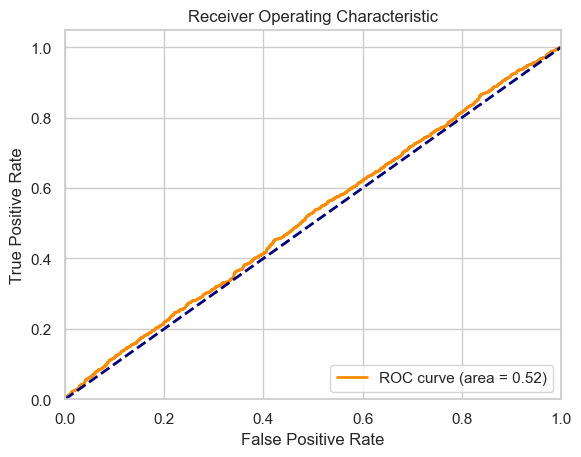

In [48]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

Receiver Operating Characteristic (ROC) Curve:

The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
The curve is created by plotting the True Positive Rate (TPR, also known as recall or sensitivity) against the False Positive Rate (FPR, or 1 - specificity) at various threshold settings.


True Positive Rate and False Positive Rate:

True Positive Rate (TPR): It measures how many actual positives (true outcomes) are correctly identified by the classifier.
False Positive Rate (FPR): It measures how many actual negatives (false outcomes) are incorrectly identified as positive.


Area Under the Curve (AUC):

The AUC value is 0.52, which is slightly above 0.50. An AUC of 0.50 suggests that the model has no discriminative ability whatsoever — it is as good as random guessing. An AUC of 0.52 indicates that the model has a very slight ability to distinguish between the positive and negative classes, but it's very minimal.
Generally, an AUC closer to 1.0 indicates a better model. The higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. In this case, 0.52 is not far from random, suggesting minimal predictive strength.


Interpretation:

This model's performance is not very effective, indicated by the AUC value close to 0.50. It means that the classifier is only slightly better than a random guess.
The curve mostly follows along the diagonal line (line of no discrimination), which visually reinforces the low AUC value.


For improving the model's performance:

Consider using different or more features.
Experiment with different model types or parameters.
Evaluate feature importance and remove or add features based on their significance.
Investigate model overfitting or underfitting and adjust accordingly.

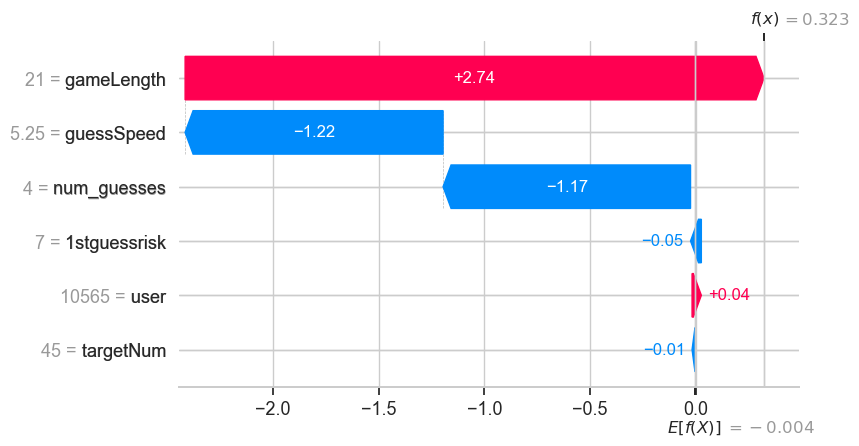

In [ ]:
# Explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Understanding the Components of the SHAP Waterfall Plot:

Base Value (E[f(X)]): This is the average model output across all data points in the training set, also referred to as the expected value of the model output. For your plot, the base value is approximately -0.004. This means that, on average, the model tends to predict slightly below zero for the probability of a class in a logistic regression context.


Output Value (f(x)): This is the actual model prediction for the specific instance being explained, indicated at the top right of your plot as 0.323. This value represents the probability (transformed via the logistic function in logistic regression) that the instance belongs to the positive class according to the model.


Red Bars (Positive Contribution): These bars show features that push the prediction higher (toward the positive class). In your plot, gameLength significantly increases the predicted probability by about +2.74.


Blue Bars (Negative Contribution): These bars show features that push the prediction lower (toward the negative class). For instance, guessSpeed and num_guesses decrease the predicted probability by -1.22 and -1.17, respectively.


Detailed Analysis of the Plot:
gameLength: The most impactful feature, increasing the likelihood of the positive class substantially. A longer game length might indicate higher engagement or satisfaction, which could correlate with the desired outcome (such as a return visit or continued usage).


guessSpeed: This feature considerably lowers the likelihood of the positive class. Faster guessing might indicate less thoughtful engagement or quick sessions that are less indicative of retention.


num_guesses: Similar to guessSpeed, more guesses negatively impact the model's prediction, which could suggest that too many guesses lead to frustration or a negative experience.


1stguessrisk, user, and targetNum: These features have minimal impacts on the prediction, suggesting that they are less relevant for determining the outcome in this particular instance.


Implications of the SHAP Plot:
This plot helps in understanding the decision-making process of the model for a specific prediction. By knowing how each feature influences the prediction, you can:


Gain Insights: Understand what drives predictions in your model, which can inform business strategies or model adjustments.
Identify Key Features: Recognize which features are most important and how they affect the model's output, guiding feature engineering and data collection efforts.
Enhance Model Fairness and Transparency: Address potential biases by analyzing how different features contribute to predictions across different segments of your data.
The use of SHAP values, especially in complex models, enhances transparency and allows stakeholders to trust and verify model decisions better, making it a powerful tool for model explainability.